# Moon Death aka rocky ringed exoplanets?
### Riley McGlasson


If Earth’s moon was retrograde and spiraled in and formed rings, how big would the ring be?
What about Mars' moons?
What do these scenarios say about the likelihood of seeing ringed rocky exoplanets?


### From Canup 2010, look at equation 1 for classical roche limit. This will be the outer radius of the ring for the majority of the ring lifetime (Piro 2018)
classical Roche limit: $a_R=2.456R_p(\rho_p/\rho)^{1/3}$ where $R_p$ is the radius of the planet, $\rho_p$ is the density of the planet, and $\rho$ is the density of the satellite.

### Area of the ring assuming R_i≈R_e/2   (half the distance to the outer edge). This is similar to what we see with Saturn, which should be reasonable considering that the formation mechanism is the same. 
  * area of ring $=\pi (R_e^2-R_i^2)$


### How would the ringed planet be observed? Different ring orientations face on or edge on?
face on (i=0 deg) is the max case. Will approximate the decreasing effect with cos(i)
Then occulted area is ring area plus cross secitonal planet area. 
Observed radius from Piro:
$$R_{obs}=(A/\pi)^{1/2}$$ (just invert area of a circle)


### What would the resulting density of the observed ringed planet be? How would a transit observation be affected?




***

In [16]:
#Import packages
import numpy as np
import matplotlib.pyplot as plt

In [22]:
#General variables
G = 6.67e-11 #Nm^2/kg^2
rho_Neptune = 1638 #kg/m^3
ringSize=[50,70,90]
inclination = np.linspace(0,90,20)
print(inclination)

[ 0.          4.73684211  9.47368421 14.21052632 18.94736842 23.68421053
 28.42105263 33.15789474 37.89473684 42.63157895 47.36842105 52.10526316
 56.84210526 61.57894737 66.31578947 71.05263158 75.78947368 80.52631579
 85.26315789 90.        ]


In [23]:
#Earth/moon variables
M_Earth = 5.972e24 #kg
R_Earth = 6.378e6 #m
rho_Earth = 5510 #kg/m^3
V_esc_Earth = np.sqrt(2*G*M_Earth/R_Earth) #m/s
print('V_ecs for Earth:',V_esc_Earth,'m/s')

M_moon = 7.346e22 #kg
R_moon = 1.737e6 #m
rho_moon = 3340 #kg/m^3
V_orb_moon = 1022 #m/s, from NASA fact sheet
print('V_orb for moon:',V_orb_moon,'m/s')

V_ecs for Earth: 11176.235819783162 m/s
V_orb for moon: 1022 m/s


In [24]:
#Mars/Phobos variables

M_Mars = 6.417e23 #kg
R_Mars = 3.396e6 #m
rho_Mars = 3933 #kg/m^3
V_esc_Mars = np.sqrt(2*G*M_Mars/R_Mars) #m/s
print('V_ecs for Mars:',V_esc_Mars,'m/s')

M_Phobos = 1.06e16 #kg
R_Phobos = 9.378e6 #m
rho_Phobos = 1900 #kg/m^3
V_orb_Phobos = 2134 #m/s
print('V_orb for Phobos:',V_orb_Phobos,'m/s')

V_ecs for Mars: 5020.651697030728 m/s
V_orb for Phobos: 2134 m/s


---

### First, compute the Roche Limit for the system (this will also be the radius to the outside of the ring for the majority of the disk lifetime e.g. Piro 2018) also because outside of A_r the material will form moons (whatever paper from class)

In [25]:
#Earth/moon system
a_R_Em = 2.456*R_Earth*(rho_Earth/rho_moon)**(1/3)
print(format(a_R_Em, ".3e"),"meters")

1.851e+07 meters


In [26]:
#Mars/Phobos system
a_R_MP = 2.456*R_Mars*(rho_Mars/rho_Phobos)**(1/3)
print(format(a_R_MP, ".3e"),"meters")

1.063e+07 meters


The classical Roche limit lies outside of the surface of the planet in each system, so the moons would be disrupted before colliding with the planet.

### For a face on disk, the apparent area will be the area of the ring + cross sectional area of the planet. This is the maximum observable case. We will test r_i = 50%, 70%, and 90% of r_e for a variety of ring thicknesses. This assumes the rings are optically thick to the star's light (Reasonable, Piro sec. 2)

In [111]:
#Earth/moon system
A_Earth = np.pi*R_Earth**2
print("Area of just Earth:",format(A_Earth,".3e"), "m^2")

A_moonring={}
A_EarthandRing={}
A_incl_moonring={}
A_incl_EarthandRing={}
for i in ringSize:
    A_moonring[i] = np.pi * (a_R_Em**2-((i/100)*a_R_Em)**2)
    A_incl_moonring[i]= A_moonring[i]*np.cos(inclination* np.pi / 180.)
    A_EarthandRing[i] = A_Earth + A_moonring[i]
    A_incl_EarthandRing[i] = A_Earth + A_incl_moonring[i]
    print(" ")
    print("r_i =",i,"% of r_e")
    print("Area of just rings:",format(A_moonring[i],".3e"),"m^2")
    #print("just ring area with inclination:",A_incl_moonring[i],"m^2")
    print("Area of ringed Earth:",format(A_EarthandRing[i],".3e"), "m^2")
    #print("Area of ringed Earth with inclination:",A_incl_EarthandRing[i]/A_Earth, "m^2")


Area of just Earth: 1.278e+14 m^2
 
r_i = 50 % of r_e
Area of just rings: 8.072e+14 m^2
Area of ringed Earth: 9.350e+14 m^2
 
r_i = 70 % of r_e
Area of just rings: 5.489e+14 m^2
Area of ringed Earth: 6.767e+14 m^2
 
r_i = 90 % of r_e
Area of just rings: 2.045e+14 m^2
Area of ringed Earth: 3.323e+14 m^2


In [93]:
#Mars/Phobos system
A_Mars = np.pi*R_Mars**2
print("Area of just Mars:",format(A_Mars,".3e"), "m^2")

A_phobosring={}
A_incl_phobosring = {}
A_MarsandRing={}
A_incl_MarsandRing = {}
for i in ringSize:
    A_phobosring[i] = np.pi * (a_R_MP**2-((i/100)*a_R_MP)**2)
    A_incl_phobosring[i] = A_phobosring[i]*np.cos(inclination* np.pi / 180.)
    A_MarsandRing[i] = A_Mars + A_phobosring[i]
    A_incl_MarsandRing[i] = A_Mars + A_incl_phobosring[i]
    print(" ")
    print("r_i =",i,"% of r_e")
    print("Area of just rings:",format(A_phobosring[i],".3e"),"m^2")
    #print("just ring area with inclination:",A_incl_phobosring[i],"m^2")
    print("Area of ringed Mars:",format(A_MarsandRing[i],".3e"), "m^2")
    #print("Area of ringed Mars with inclination:",A_incl_MarsandRing[i], "m^2")

Area of just Mars: 3.623e+13 m^2
 
r_i = 50 % of r_e
Area of just rings: 2.662e+14 m^2
Area of ringed Mars: 3.025e+14 m^2
 
r_i = 70 % of r_e
Area of just rings: 1.810e+14 m^2
Area of ringed Mars: 2.173e+14 m^2
 
r_i = 90 % of r_e
Area of just rings: 6.744e+13 m^2
Area of ringed Mars: 1.037e+14 m^2


### What would the density of the ringed planet appear to be if we assume it has no rings? Assuming no mass loss from the rings yet, the mass of rings would be ≈ mass of the moon

In [114]:
#Earth/moon system
#mass of system
M_EarthandRing = M_Earth + M_moon

#apparent volume and density
V_EarthandRing = {}
rho_EarthandRing = {}
R_Earth_inf = {}
#with inclination
V_EarthandRing_incl = {}
rho_EarthandRing_incl = {}
R_Earth_inf_incl = {}
for i in ringSize:
    R_Earth_inf[i] = (A_EarthandRing[i]/np.pi)**.5 #find r_inf by inverting the area found above
    V_EarthandRing[i] = (4/3)*np.pi*R_Earth_inf[i]**3
    rho_EarthandRing[i] = M_EarthandRing/V_EarthandRing[i]
    
    R_Earth_inf_incl[i] = (A_incl_EarthandRing[i]/np.pi)**.5 #find r_inf by inverting the area found above
    V_EarthandRing_incl[i] = (4/3)*np.pi*R_Earth_inf_incl[i]**3
    rho_EarthandRing_incl[i] = M_EarthandRing/V_EarthandRing_incl[i]
    print("r_i =",i,"% of r_e")
    print("Inferred radius of ringed Earth system:",format(R_Earth_inf[i],".3e"),"m")
    print("INCLInferred radius of ringed Earth system/REarth:",R_Earth_inf_incl[i]/R_Earth,"m")

    print("Inferred volume of ringed Earth system:",format(V_EarthandRing[i],".3e"),"m^3")
    print("Inferred density of ringed Earth system:",format(rho_EarthandRing[i],".3f"),"kg/m^3")
    #print("INCLInferred density of ringed Earth system:",rho_EarthandRing_incl[i],"m^3")
    print(" ")
    
    
print("For comparison:")
print("Radius of Earth:", format(R_Earth,".3e"), "m")
print("Density of Earth:",rho_Earth,"kg/m^3")
print("Density of Neptune:",rho_Neptune,"kg/m^3")


r_i = 50 % of r_e
Inferred radius of ringed Earth system: 1.725e+07 m
INCLInferred radius of ringed Earth system/REarth: [2.70484446 2.70085368 2.68887319 2.66887805 2.64082474 2.60464824
 2.56025734 2.5075281  2.4462944  2.37633484 2.29735385 2.20895456
 2.11059825 2.00154218 1.88073976 1.74667153 1.59703832 1.42814903
 1.23352596 1.        ] m
Inferred volume of ringed Earth system: 2.151e+22 m^3
Inferred density of ringed Earth system: 281.100 kg/m^3
 
r_i = 70 % of r_e
Inferred radius of ringed Earth system: 1.468e+07 m
INCLInferred radius of ringed Earth system/REarth: [2.30108775 2.297898   2.28832396 2.27235094 2.24995325 2.22109227
 2.18571361 2.143743   2.0950805  2.03959254 1.97710081 1.90736639
 1.83006693 1.74476255 1.65084336 1.54744492 1.43330435 1.30649706
 1.16390665 1.        ] m
Inferred volume of ringed Earth system: 1.324e+22 m^3
Inferred density of ringed Earth system: 456.549 kg/m^3
 
r_i = 90 % of r_e
Inferred radius of ringed Earth system: 1.028e+07 m
INCLInferr

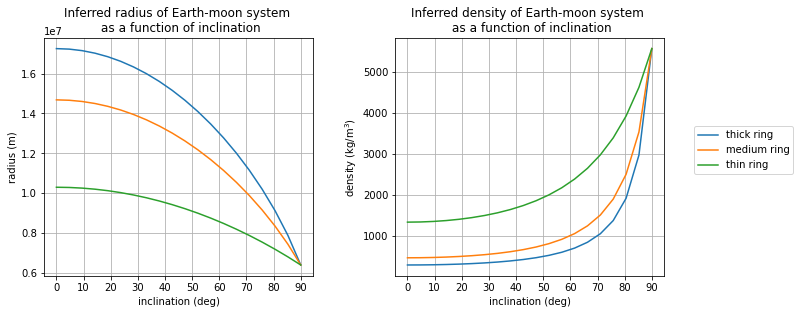

In [95]:
#Earth/moon plots
#all three
# f = plt.figure(figsize=(5,15)
# ax = f.add_subplot(311)
# ax2 = f.add_subplot(312)
# ax3 = f.add_subplot(313)
#just radius and density
f = plt.figure(figsize=(12,5))
ax = f.add_subplot(121)
ax3 = f.add_subplot(122)


#radius plot
#plt.subplot(3,1,1)
for i in ringSize:
    ax.plot(inclination,R_Earth_inf_incl[i])
ax.set_xlabel('inclination (deg)')
ax.set_ylabel('radius (m)')
ax.set_title('Inferred radius of Earth-moon system \n as a function of inclination')
ax.set_xticks([0,10,20,30,40,50,60,70,80,90])
#plt.yticks([500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500])
ax.grid()

# #volume plot
# #plt.subplot(3,1,2)
# for i in ringSize:
#     ax2.plot(inclination,V_EarthandRing_incl[i])
# ax2.set_xlabel('inclination (deg)')
# ax2.set_ylabel('volume (m$^3$)')
# ax2.set_title('Inferred volume of Earth-moon system as a function of inclination')
# ax2.set_xticks([0,10,20,30,40,50,60,70,80,90])
# #plt.yticks([500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500])
# ax2.grid()

#density plot
#plt.subplot(3,1,3)
for i in ringSize:
    ax3.plot(inclination,rho_EarthandRing_incl[i])
ax3.set_xlabel('inclination (deg)')
ax3.set_ylabel('density (kg/m$^3$)')
ax3.set_title('Inferred density of Earth-moon system \n as a function of inclination')
ax3.set_xticks([0,10,20,30,40,50,60,70,80,90])
#plt.yticks([500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500])
ax3.grid()

plt.legend(['thick ring','medium ring','thin ring'],bbox_to_anchor=(1.5, .65))
f.tight_layout(pad=3.0)

plt.savefig('/Users/Riley/Desktop/origins/EarthMoon_R_rho.png',bbox_inches='tight')
plt.show()

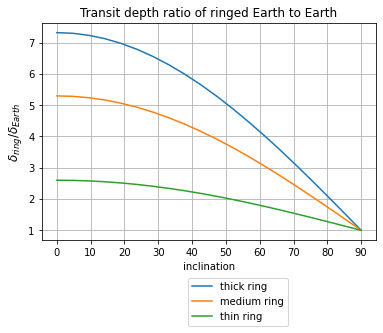

In [104]:
#Earth/moon
for i in ringSize:
    plt.plot(inclination,(R_Earth_inf_incl[i]**2)/(R_Earth**2))
plt.xlabel('inclination')
plt.xticks([0,10,20,30,40,50,60,70,80,90])
plt.ylabel('$\delta_{ring}/\delta_{Earth}$',fontsize='large')
plt.title('Transit depth ratio of ringed Earth to Earth')
plt.legend(['thick ring','medium ring','thin ring'],bbox_to_anchor=(.75, -.15))
plt.grid()
plt.savefig('/Users/Riley/Desktop/origins/Earth_delta.png',bbox_inches='tight')
plt.show()


In [115]:
#Mars/phobos system
#mass of system
M_MarsandRing = M_Mars + M_Phobos

#apparent volume and density
V_MarsandRing = {}
rho_MarsandRing = {}
R_Mars_inf = {}

#with inclination
V_MarsandRing_incl = {}
rho_MarsandRing_incl = {}
R_Mars_inf_incl = {}
for i in ringSize:
    R_Mars_inf[i] = (A_MarsandRing[i]/np.pi)**.5 #find r_inf by inverting the area found above
    V_MarsandRing[i] = (4/3)*np.pi*R_Mars_inf[i]**3
    rho_MarsandRing[i] = M_MarsandRing/V_MarsandRing[i]
    
    R_Mars_inf_incl[i] = (A_incl_MarsandRing[i]/np.pi)**.5 #find r_inf by inverting the area found above
    V_MarsandRing_incl[i] = (4/3)*np.pi*R_Mars_inf_incl[i]**3
    rho_MarsandRing_incl[i] = M_MarsandRing/V_MarsandRing_incl[i]
    print("r_i =",i,"% of r_e")
    print("Inferred radius of ringed Mars system:",format(R_Mars_inf[i],".3e"),"m")
    print("INCLInferred radius of ringed Mars system/RMars:",R_Mars_inf_incl[i]/R_Mars,"m")
    print("Inferred volume of ringed Mars system:",format(V_MarsandRing[i],".3e"),"m^3")
    print("Inferred density of ringed Mars system:",format(rho_MarsandRing[i],".3f"),"kg/m^3")
    print(" ")
    

print("For comparison:")
print("Radius of Mars:", format(R_Mars,".3e"), "m")
print("Density of Mars:",rho_Mars,"kg/m^3")
print("Density of Neptune:",rho_Neptune,"kg/m^3")

r_i = 50 % of r_e
Inferred radius of ringed Mars system: 9.812e+06 m
INCLInferred radius of ringed Mars system/RMars: [2.88927809 2.88493171 2.87188296 2.85010232 2.81953842 2.78011445
 2.73172284 2.67421744 2.60740245 2.53101684 2.44471187 2.34801847
 2.24029811 2.12066667 1.98787047 1.8400729  1.67445802 1.48641487
 1.26759105 1.        ] m
Inferred volume of ringed Mars system: 3.957e+21 m^3
Inferred density of ringed Mars system: 162.171 kg/m^3
 
r_i = 70 % of r_e
Inferred radius of ringed Mars system: 8.316e+06 m
INCLInferred radius of ringed Mars system/RMars: [2.44879378 2.44530674 2.43483962 2.41737391 2.39287732 2.36130149
 2.32257844 2.27661557 2.22328863 2.16243184 2.09382401 2.01716873
 1.93206527 1.83796476 1.73410142 1.61937964 1.49217645 1.34996735
 1.1885349  1.        ] m
Inferred volume of ringed Mars system: 2.409e+21 m^3
Inferred density of ringed Mars system: 266.369 kg/m^3
 
r_i = 90 % of r_e
Inferred radius of ringed Mars system: 5.745e+06 m
INCLInferred radius o

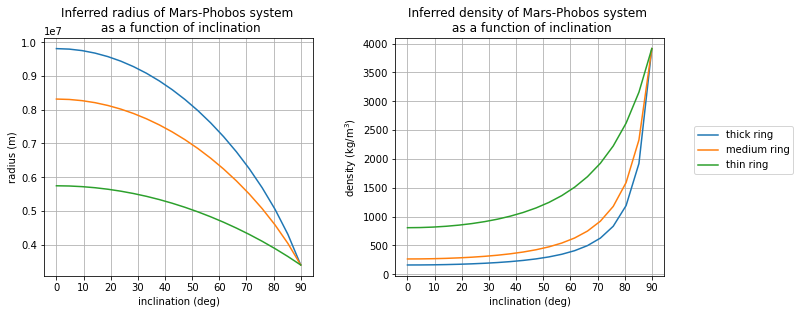

In [100]:
#Earth/moon plots
#all three
# f = plt.figure(figsize=(5,15)
# ax = f.add_subplot(311)
# ax2 = f.add_subplot(312)
# ax3 = f.add_subplot(313)
#just radius and density
f = plt.figure(figsize=(12,5))
ax = f.add_subplot(121)
ax3 = f.add_subplot(122)


#radius plot
#plt.subplot(3,1,1)
for i in ringSize:
    ax.plot(inclination,R_Mars_inf_incl[i])
ax.set_xlabel('inclination (deg)')
ax.set_ylabel('radius (m)')
ax.set_title('Inferred radius of Mars-Phobos system \n as a function of inclination')
ax.set_xticks([0,10,20,30,40,50,60,70,80,90])
#plt.yticks([500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500])
ax.grid()

# #volume plot
# #plt.subplot(3,1,2)
# for i in ringSize:
#     ax2.plot(inclination,V_MarsandRing_incl[i])
# ax2.set_xlabel('inclination (deg)')
# ax2.set_ylabel('volume (m$^3$)')
# ax2.set_title('Inferred volume of Mars-Phobos system as a function of inclination')
# ax2.set_xticks([0,10,20,30,40,50,60,70,80,90])
# #plt.yticks([500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500])
# ax2.grid()

#density plot
#plt.subplot(3,1,3)
for i in ringSize:
    ax3.plot(inclination,rho_MarsandRing_incl[i])
ax3.set_xlabel('inclination (deg)')
ax3.set_ylabel('density (kg/m$^3$)')
ax3.set_title('Inferred density of Mars-Phobos system \n as a function of inclination')
ax3.set_xticks([0,10,20,30,40,50,60,70,80,90])
#plt.yticks([500,1000,1500,2000,2500,3000,3500,4000,4500,5000,5500])
ax3.grid()

plt.legend(['thick ring','medium ring','thin ring'],bbox_to_anchor=(1.5, .65))
f.tight_layout(pad=3.0)

plt.savefig('/Users/Riley/Desktop/origins/MarsPhobos_R_rho.png',bbox_inches='tight')
plt.show()


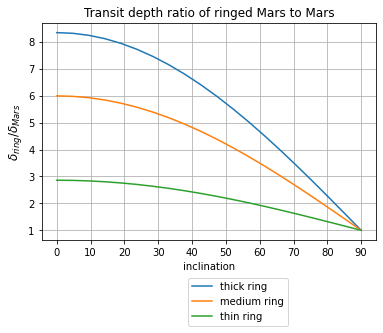

In [103]:
#Mars/phobos
for i in ringSize:
    plt.plot(inclination,(R_Mars_inf_incl[i]**2)/(R_Mars**2))
plt.xlabel('inclination')
plt.xticks([0,10,20,30,40,50,60,70,80,90])
plt.ylabel('$\delta_{ring}/\delta_{Mars}$',fontsize='large')
plt.title('Transit depth ratio of ringed Mars to Mars')
plt.legend(['thick ring','medium ring','thin ring'],bbox_to_anchor=(.75, -.15))
plt.grid()
plt.savefig('/Users/Riley/Desktop/origins/Mars_delta.png',bbox_inches='tight')
plt.show()